# MOVIELENS RECOMMENDATION SYSTEM

## Introduction
In today's world of countless movie options, it can be challenging for users to find movies that match their preferences. Recommendation systems come to the rescue by offering personalized movie recommendations based on user ratings. In this task, we aim to build a recommendation system using the MovieLens dataset to provide users with their top 5 movie recommendations.

## Business Understanding
The goal of this recommendation system is to enhance the movie-watching experience for users by suggesting movies that they are likely to enjoy based on their ratings of other movies. By offering personalized recommendations, we can increase user engagement, satisfaction, and ultimately drive user retention on the platform.

## Problem Statement
The problem is to build a recommendation system that can accurately predict and recommend the top 5 movies for a user based on their ratings of other movies. The system should leverage collaborative filtering techniques and content based filtering techniques to analyze user preferences and generate accurate recommendations.

## Metric of success
Root Mean Squared Error (RMSE): RMSE is a commonly used evaluation metric for recommendation systems that deal with explicit ratings. It measures the average magnitude of the differences between the predicted ratings and the actual ratings given by users. A lower RMSE indicates better accuracy and performance of the recommendation system.

Mean Absolute Error (MAE): MAE is another widely used metric for recommendation systems. It calculates the average absolute difference between the predicted ratings and the actual ratings. MAE provides a measure of how well the recommendation system can estimate user preferences without considering the direction of the errors. Like RMSE, a lower MAE indicates better accuracy and performance of the recommendation system.

## Data Exploration

### Data Understanding
The Data sourced for this project was the "movielens Dataset" which was sourced from grouplens.org/datasets/movielens.
The dataset includes:

`ratings.csv`: This file contains user ratings for movies. It includes the following columns:
- **userId**: The ID of the user who provided the rating.
- **movieId**: The ID of the movie being rated.
- **rating**: The rating given by the user to the movie (on a scale of 0.5 to 5 in increments of 0.5).
- **timestamp**: The timestamp when the rating was recorded.

`movies.csv`: This file contains information about movies. It includes the following columns:
- **movieId**: The ID of the movie.
- **title**: The title of the movie along with the release year.
- **genres**: The genre(s) of the movie, separated by "|" if multiple genres apply.

`tags.csv`:This file contains user-generated tags for movies.
Each row represents a specific tag assigned by a user to a movie.

`links.csv`:This file contains links to external movie databases (IMDb and TMDB).


**Importing Libraries**

In [42]:
## DataFrame Manipulation
import pandas as pd
## 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV
import numpy as np




### Loading and Exploring the data

**Ratings.csv - Data Exploration**

In [2]:
ratings_df = pd.read_csv("Data/ratings.csv")
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [4]:
ratings_df.shape

(100836, 4)

In [5]:
ratings_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [6]:
ratings_df.duplicated().sum()

0

In [7]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


**Movies.csv - Data Exploration**

In [8]:
movies_df = pd.read_csv("Data/movies.csv")
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [10]:
movies_df.shape

(9742, 3)

In [11]:
movies_df.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [12]:
movies_df.duplicated().sum()

0

**Tags.csv -Data Exploration**

In [13]:
tags_df = pd.read_csv("Data/tags.csv")
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [14]:
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [15]:
tags_df.shape

(3683, 4)

**Links_csv -Data Exploration**

In [16]:
links_df = pd.read_csv("Data/links.csv")
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


**Merging ratings_df and movies_df**:
This projects goals is to build a recommendation system based on movie ratings thus the relevant datasets to use are ratings_df and movies_df.

In [17]:
## Extracting the year from the title column
movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)', expand=False)
movies_df.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [18]:
# Remove the year from the title column
movies_df['title'] = movies_df['title'].str.replace(r'\s*\(\d{4}\)', '', regex=True)
movies_df.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [19]:
# Merge ratings and movies based on movieId
merged_df = pd.merge(ratings_df, movies_df, on='movieId')
merged_df

,userId,movieId,rating,timestamp,title,genres,year
0,1,1,4.0,964982703,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,5,1,4.0,847434962,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
2,7,1,4.5,1106635946,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
3,15,1,2.5,1510577970,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
4,17,1,4.5,1305696483,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
...,...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon,Action|Thriller,1997
100832,610,160527,4.5,1479544998,Sympathy for the Underdog,Action|Crime|Drama,1971
100833,610,160836,3.0,1493844794,Hazard,Action|Drama|Thriller,2005
100834,610,163937,3.5,1493848789,Blair Witch,Horror|Thriller,2016


## Exploratory Data Analysis

In [20]:
## Count Number of rated movie titles for each user
movie_rated_per_user = merged_df['userId'].value_counts()
movie_rated_per_user

userId
414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
431      20
194      20
257      20
207      20
189      20
Name: count, Length: 610, dtype: int64

In [21]:
print("Number of unique users:",len(movie_rated_per_user))
print("Minimum Number of titles rated:",movie_rated_per_user.min())
print("Maximum Number of title rated:",movie_rated_per_user.max())


Number of unique users: 610
Minimum Number of titles rated: 20
Maximum Number of title rated: 2698


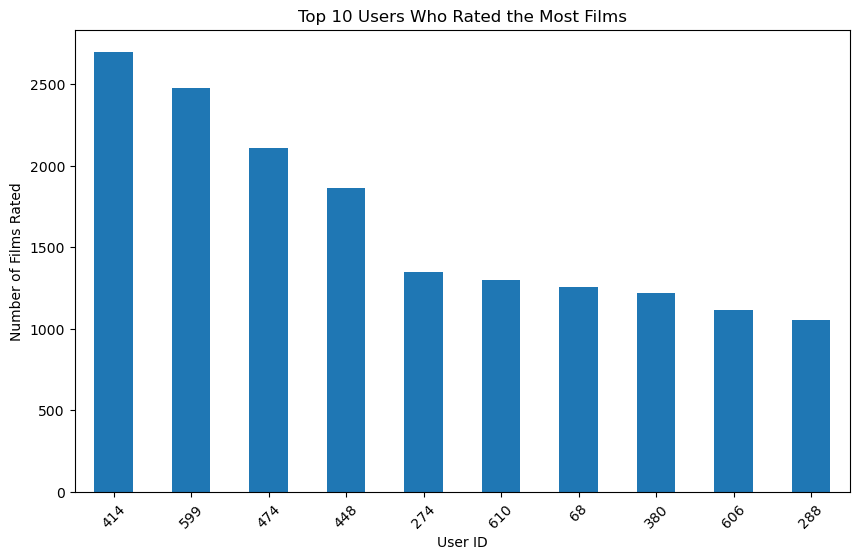

In [22]:
# Get the top 10 users who rated the most films
top_10_users = movie_rated_per_user.head(10)

# Adding text labels on top of each bar
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, count, str(count), ha='center', va='bottom')

# Visualize the top 10 users
plt.figure(figsize=(10, 6))
top_10_users.plot(kind='bar')
plt.xlabel('User ID')
plt.ylabel('Number of Films Rated')
plt.title('Top 10 Users Who Rated the Most Films')
plt.xticks(rotation=45)
plt.show()

In [23]:
# Top 10 Frequently rated movies
top_10_titles = merged_df['title'].value_counts().head(10)
top_10_titles

title
Forrest Gump                          329
Shawshank Redemption, The             317
Pulp Fiction                          307
Silence of the Lambs, The             279
Matrix, The                           278
Star Wars: Episode IV - A New Hope    251
Jurassic Park                         238
Braveheart                            237
Terminator 2: Judgment Day            224
Schindler's List                      220
Name: count, dtype: int64

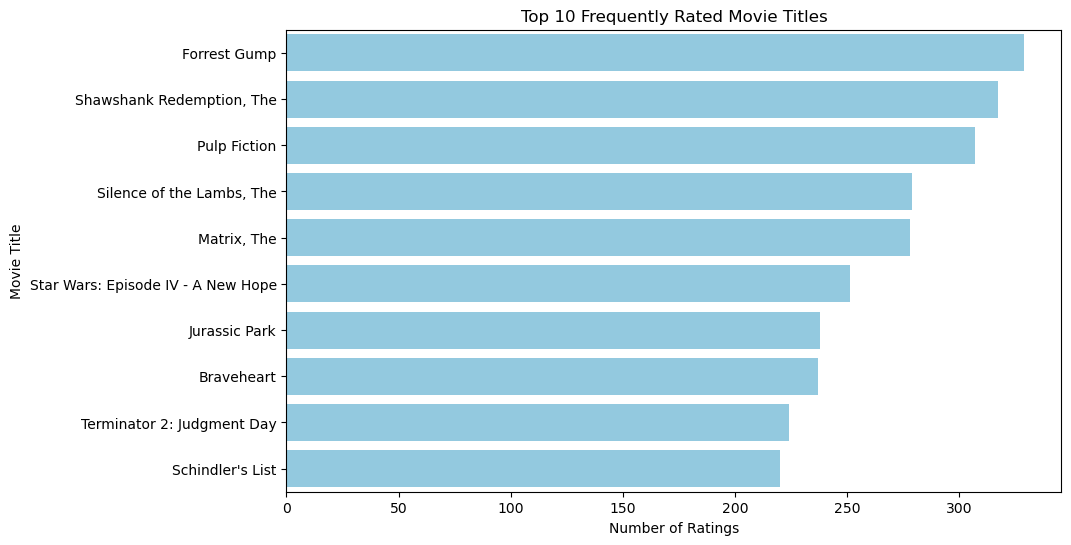

In [24]:
# Visualize the top 10 frequently rated movie titles using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(y='title', data=merged_df, order=top_10_titles.index, color='skyblue')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.title('Top 10 Frequently Rated Movie Titles')
plt.show()

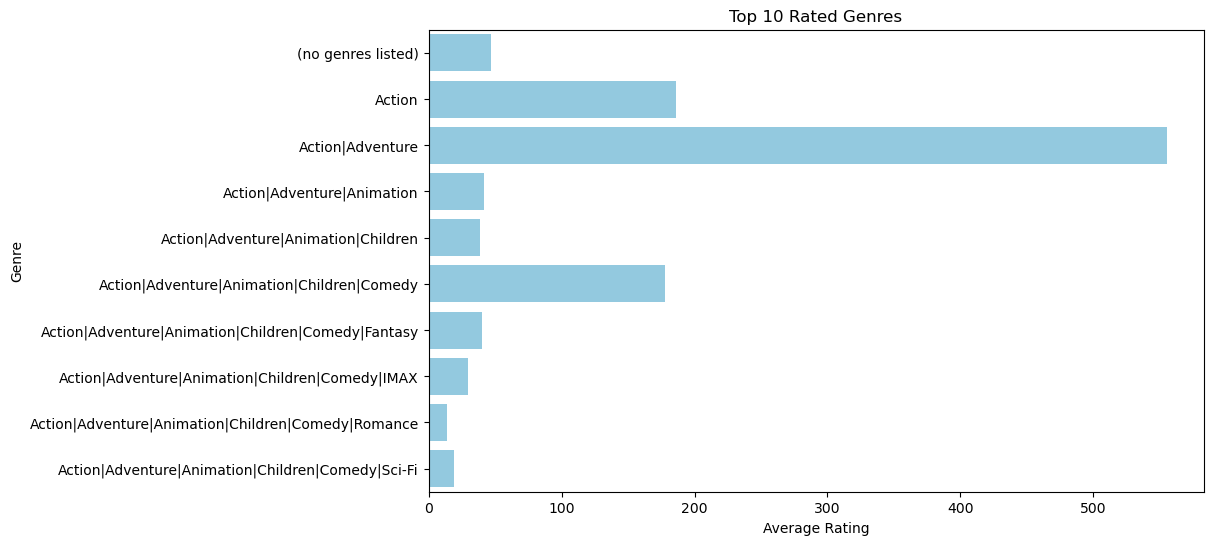

In [25]:
# Calculate average ratings for each genre
rating_genres = merged_df.groupby('genres')['rating'].count()

# select the top 10 rated genres
top_10_genres = rating_genres.head(10)

# Visualize the top 10 rated genres using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_genres, y=top_10_genres.index, color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Top 10 Rated Genres')
plt.show()

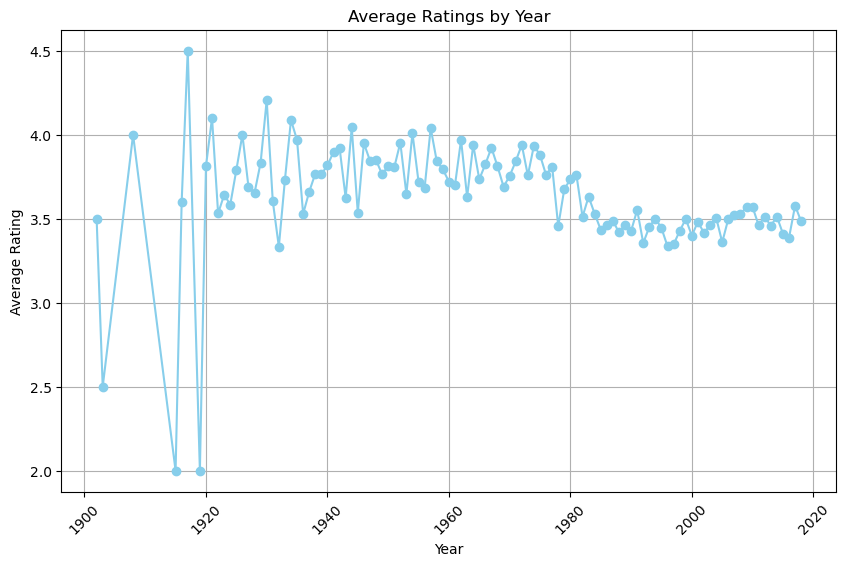

In [26]:
# Investigate patterns or trends in user ratings over time
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'], unit='s')
merged_df['year'] = pd.to_datetime(merged_df['year'], format='%Y').dt.year
ratings_by_year = merged_df.groupby('year')['rating'].mean()

# Visualize average ratings by year using a line plot
plt.figure(figsize=(10, 6))
plt.plot(ratings_by_year.index, ratings_by_year.values, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Content based filtering

I need to build a recommendation system that suggests movies based on their content features. In this context, I will use the movie genre as a content feature to recommend similar movies.

In [27]:

def get_recommendations(title, merged_df, sample_size=3000):
    # Take a random sample from the merged_df DataFrame
    sample_df = merged_df.sample(n=sample_size, random_state=42)

    # Create a TF-IDF vectorizer
    tfidf_vectorizer = TfidfVectorizer()

    # Apply the TF-IDF vectorizer on the "genres" column of the sample DataFrame
    tfidf_matrix = tfidf_vectorizer.fit_transform(sample_df['genres'])

    # Compute the cosine similarity matrix
    cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

    # Get the index of the movie that matches the title
    matching_movies = sample_df[sample_df['title'] == title]
    if matching_movies.empty:
        print("Movie not found in the sample dataset.")
        return None

    idx = matching_movies.index[0]

    # Get the pairwise similarity scores of the movie with all other movies
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top 5 similar movies (excluding the movie itself)
    top_movies_indices = [i[0] for i in sim_scores[1:6]]
    top_movies = sample_df.iloc[top_movies_indices]

    return top_movies

# Get recommendations for a specific movie
recommendations = get_recommendations('Forrest Gump', merged_df)

print(recommendations[['title', 'genres']])

            title                genres
25340   Apollo 13  Adventure|Drama|IMAX
25424   Apollo 13  Adventure|Drama|IMAX
25355   Apollo 13  Adventure|Drama|IMAX
43178  Life of Pi  Adventure|Drama|IMAX
25439   Apollo 13  Adventure|Drama|IMAX


## Collaborative Filtering Techniques
I will use the ratings column to identify similar users and recommend movies based on their preferences. 

In [28]:
# Drop unnecessary columns
new_df = merged_df.drop(columns='timestamp')
new_df.head()

,userId,movieId,rating,title,genres,year
0,1,1,4.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,5,1,4.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,7,1,4.5,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
3,15,1,2.5,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
4,17,1,4.5,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0


In [32]:
# Load the ratings data into Surprise Dataset format
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(new_df[['userId', 'movieId', 'rating']], reader)

In [33]:
dataset = data.build_full_trainset()
print('Number of users: ', dataset.n_users, '\n')
print('Number of items: ', dataset.n_items)

Number of users:  610 

Number of items:  9724


In [36]:
## Perform a gridsearch with SVD
params = {'n_factors': [20, 50, 100],
         'reg_all': [0.02, 0.05, 0.1]}
g_s_svd = GridSearchCV(SVD,param_grid=params,n_jobs=-1)
g_s_svd.fit(data)

In [37]:
print(g_s_svd.best_score)
print(g_s_svd.best_params)

{'rmse': 0.869039615537807, 'mae': 0.6679826056593118}
{'rmse': {'n_factors': 50, 'reg_all': 0.05}, 'mae': {'n_factors': 50, 'reg_all': 0.05}}


In [38]:
# cross validating with KNNBasic
similarity_options = {'name': 'cosine', 'user_based': True}
knn_model = KNNBasic(sim_options=similarity_options)
cv_knn_model = cross_validate(knn_model, data, n_jobs=-1)

Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [39]:
for i in cv_knn_model.items():
    print(i)
print('-----------------------')
print(np.mean(cv_knn_model['test_rmse']))

('test_rmse', array([0.97092829, 0.97799824, 0.97564602, 0.96856763, 0.97298854]))
('test_mae', array([0.75012991, 0.74781308, 0.75143695, 0.74781769, 0.75063815]))
('fit_time', (0.5176348686218262, 0.6208117008209229, 0.7636115550994873, 0.4765486717224121, 0.3528482913970947))
('test_time', (2.2960116863250732, 2.190112590789795, 1.9308032989501953, 1.9074411392211914, 0.9323885440826416))
-----------------------
0.9732257452105328


**After computing both pearson and cosine similarity and comparing The RSME value obtained from cross validation, Cosine similarity appears to be the best similarity metric.**

In [44]:
# cross validating with KNNBaseline
similarity_options = {'name': 'cosine', 'user_based': True}
knn_baseline = KNNBaseline(sim_options=similarity_options)
cv_knn_baseline = cross_validate(knn_baseline, data, n_jobs=-1)

Estimating biases using als...
Computing the cosine similarity matrix...
Estimating biases using als...
Computing the cosine similarity matrix...
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [45]:
for i in cv_knn_baseline.items():
    print(i)

np.mean(cv_knn_baseline['test_rmse'])

('test_rmse', array([0.86973154, 0.877238  , 0.88669703, 0.88055735, 0.87654148]))
('test_mae', array([0.6684986 , 0.67046072, 0.68031556, 0.6711739 , 0.66964152]))
('fit_time', (0.8960673809051514, 1.1892030239105225, 1.172196865081787, 0.8024716377258301, 0.38933777809143066))
('test_time', (3.289760112762451, 2.833893060684204, 2.7164297103881836, 2.7621819972991943, 1.4516377449035645))


0.8781530795407745

**Making Predictions**

In [46]:
# Using best parameters observed during grid searchto make predictions
svd = SVD(n_factors= 50, reg_all=0.05)
svd.fit(dataset)

In [47]:
svd.predict(10, 4)

Prediction(uid=10, iid=4, r_ui=None, est=2.7792591158849813, details={'was_impossible': False})

The SVD model predicted that UserId 10 would give a recommendation of 2.7 for MovieId 4.Thus model works.